In [1]:
%matplotlib inline
%load_ext rpy2.ipython

import os
import glob
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook', font_scale=1.5)

C:\Users\petri\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
def plot_vectors(vs):
    """Plot vectors in vs assuming origin at (0,0)."""
    n = len(vs)
    X, Y = np.zeros((n, 2))
    U, V = np.vstack(vs).T
    plt.quiver(X, Y, U, V, range(n), angles='xy', scale_units='xy', scale=1)
    xmin, xmax = np.min([U, X]), np.max([U, X])
    ymin, ymax = np.min([V, Y]), np.max([V, Y])
    xrng = xmax - xmin
    yrng = ymax - ymin
    xmin -= 0.05*xrng
    xmax += 0.05*xrng
    ymin -= 0.05*yrng
    ymax += 0.05*yrng
    plt.axis([xmin, xmax, ymin, ymax])

# Review of linear algebra

### Coordinates

When we have a set of basis vectors $\left\{v_1,...,v_n\right\}$ for a vector space, as we have said, any vector may be represented as:

$$c_1v_1+...+c_nv_n$$

The $c_i's$ are called *coordinates*. For example, in the space of $2^{nd}$ degree polynomials, the vector:

$$2 x +\pi x^2$$

has coordinates $(0,2,\pi)$.

You probably think of coordinates in terms of the coordinate plane, and equate the coordinates with the $n$-tuples that label the points. This is all true - but skips a step. Now that we have separated our basis vectors from their coordinates, let's see how this applies in the case of the real vector spaces you are accustomed to.

The coordinates of the pictured vector (below) are $(2,3)$. But what does that mean? It means we have assumed the *standard basis*, $\left\{e_1,e_2\right\}$, and the vector $(2,3)$ really means:

$$2e_1 + 3e_2$$

where $e_1$ is a unit vector (length = 1) on the horizontal axis and $e_2$ is a unit vector along the vertical axis. This is a *choice of coordinates*. We could equally well choose the basis $\left\{v,e_2\right\}$ where $v$ is any vector that is linearly independent of $e_1$. Then all vectors would be considered of the form:

$$c_1 v + c_2 e_1$$.




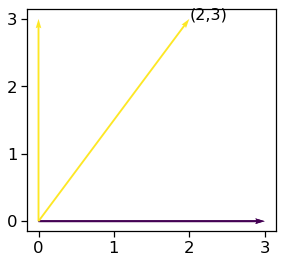

In [3]:
a1 = np.array([3,0])         # axis
a2 = np.array([0,3])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([a1, a2])
v1 = np.array([2,3])
plot_vectors([a1,v1])
plt.text(2,3,"(2,3)",fontsize=16)
plt.tight_layout()

Note that in the standard basis, the coordinates of $e_1$ are $(1,0)$. This is because:

$$e_1 = 1\cdot e_1 + 0\cdot e_2$$

Similarly, the coordinates of $e_2$ are $(0,1)$ because

$$e_2 = 0\cdot e_1 + 1\cdot e_2$$

In the basis $\left\{v,e_1\right\}$, the coordinates of $e_1$ are $(0,1)$, because

$$e_1 = 0\cdot v + 1\cdot e_1$$

and the coordinates of $v$ are $(1,0)$.

Well need these concepts in a moment when we talk about change of basis.

## Matrices and Linear Transformations

So we have this vector space and it consists of linear combinations of vectors. It's not terribly interesting just sitting there. So let's do something with it.

This is mathematics, and once mathematicians have objects collected into some set or 'space', we like to send them to other spaces, or back into the space itself, but changing one object into another. This is called a 'transformation'.

Let's suppose we have two vector spaces, $V$ and $W$. We'd like to define a transformation - but there is a catch. We want our transformation to act on all the vectors. Let's suppose $V=W=\mathbb{R}^2$. That seems simple enough. But there are still infinitely many vectors. Defining a transformation sounds laborious.

Ah, but we are clever. We have defined our space in such a way that for *certain* transformations, we need only define our transformation on a finite set (in the case of finite dimensional vector spaces).

### Linear Transformations

A linear transformation $f:V\rightarrow W$ is a map from $V$ to $W$ such that

$$f(c_1 v_1+c_2v_2) = c_1f(v_1)+c_2f(v_2)$$

Now, recall that a basis essentially generates the entire vector space via linear combinations. So, once we define a linear transformation $f$ on a basis, we have it for the whole space.


### Matrices, Transformations and Geometric Interpretation
Thinking back to real vector spaces, what does a matrix *do* to a vector?  Matrix multiplication has a *geometric* interpretation.  When we multiply a vector, we either rotate, reflect, dilate or some combination of those three. So multiplying by a matrix *transforms* one vector into another vector.  These are *linear transformations*. 

See the cell below for an example of a vector ($v_1 = (2,3)$) transformed by a matrix 

$$A = \left(\begin{matrix}2 & 1\\1&1\end{matrix}\right)$$

so that 

$$v_2 = Av_1$$

5


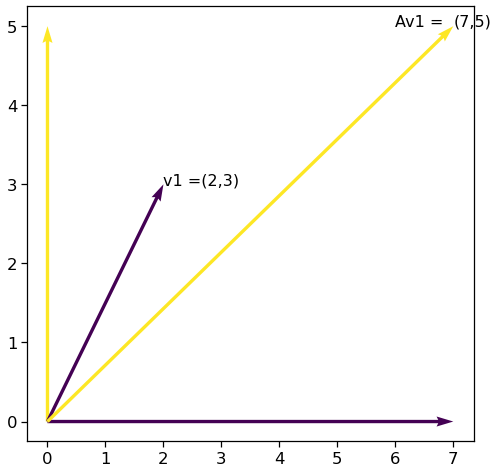

In [4]:
a1 = np.array([7,0])         # axis
a2 = np.array([0,5])

A = np.array([[2,1],[1,1]])  # transformation f in standard basis
v2 =np.dot(A,v1)
plt.figure(figsize=(8,8))
plot_vectors([a1, a2])
v1 = np.array([2,3])
plot_vectors([v1,v2])
plt.text(2,3,"v1 =(2,3)",fontsize=16)
plt.text(6,5,"Av1 = ", fontsize=16)
plt.text(v2[0],v2[1],"(7,5)",fontsize=16)
print(v2[1])

Important Facts: 

* Any matrix defines a linear transformation
* Every linear transformation may be represented by a matrix. This form is NOT unique (it depends on the chosen basis - more on that in a moment)
* We need only define a transformation by saying what it does to a *basis*

Suppose we have a matrix $A$ that defines some transformation.  We can take any invertible matrix $B$ and

$$B^{-1}AB$$

defines the same transformation.  This operation is called a *change of basis*, because we are simply expressing the transformation with respect to a different basis.

This is an important concept in matrix decompositions.

### Example - Find *a* Matrix Representation of a Linear Transformation

Note that we say find 'a' matrix representation - not 'the' matrix representation. That is because the matrix representation is dependent on the *choice of basis*. Just to motivate you as to why this is important, recall our linear system:

$$Ax=b$$

Some forms of $A$ are *much* simpler to invert. For example, suppose $A$ is diagonal. Then we can solve each equation easily:

$$Ax =b \iff \left\{\begin{matrix}d_1 & 0& \cdots &  0\\0 & d_2 & \cdots & 0\\ \vdots & & &\vdots\\ 0 &0&\cdots &d_n
\end{matrix}\right\}
\left\{\begin{matrix}x_1\\ \vdots\\x_n\end{matrix}\right\}= \left\{\begin{matrix}b_1\\ \vdots\\b_n\end{matrix}\right\} \iff x_1 = \frac{b_1}{d_1},...,x_n=\frac{b_n}{d_n}$$

So, if we could find a basis in which the transformation defined by $A$ is diagonal, our system is very easily solved. Of course, this is not always possible - but we can often simplify our system via change of basis so that the resulting system is easier to solve. (These are 'matrix decomposition methods', and we will talk about them in detail, once we have the tools to do so).



Now, let $f(x)$ be the linear transformation that takes $e_1=(1,0)$ to $f(e_1)=(2,3)$ and $e_2=(0,1)$ to $f(e_2) = (1,1)$.  A matrix representation of $f$ would be given by:

$$A = \left(\begin{matrix}2 & 1\\3&1\end{matrix}\right)$$

This is the matrix we use if we consider the vectors of $\mathbb{R}^2$ to be linear combinations of the form 

$$c_1 e_1 + c_2 e_2$$


### Example - Change to a Different Basis

Now, consider a second pair of (linearly independent) vectors in $\mathbb{R}^2$, say $v_1$ and $v_2$, and suppose that the coordinates of $v_1$ in the basis $e_1,e_2$ are $(1,3)$ and that the coordinates of $v_2$ in the basis $e_1,e_2$ are $(4,1)$. We first find the transformation that takes $e_1$ to $v_1$ and $e_2$ to $v_2$.  A matrix representation for this (in the $e_1, e_2$ basis) is:

$$B = \left(\begin{matrix}1 & 4\\3&1\end{matrix}\right)$$


Our original transformation $f$ can be expressed with respect to the basis $v_1, v_2$ via

$$BAB^{-1}$$

Here is what the new basis looks like:

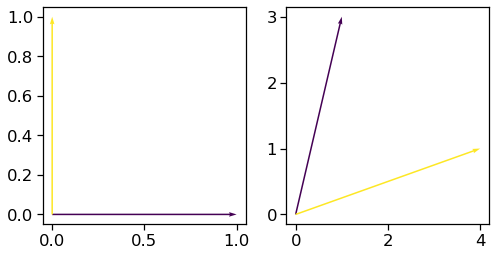

In [5]:
e1 = np.array([1,0])
e2 = np.array([0,1])
B = np.array([[1,4],[3,1]])
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([B.dot(e1), B.dot(e2)])
plt.Circle((0,0),2)
#plt.show()
#plt.tight_layout()

In [6]:
A = np.array([[2,1],[3,1]])  # transformation f in standard basis
e1 = np.array([1,0])         # standard basis vectors e1,e2
e2 = np.array([0,1])

print(A.dot(e1))             # demonstrate that Ae1 is (2,3)
print(A.dot(e2))             # demonstrate that Ae2 is (1,1) 
                              
# new basis vectors
v1 = np.array([1,3])         
v2 = np.array([4,1])

# How v1 and v2 are transformed by A
print("Av1: ")
print(A.dot(v1))   
print("Av2: ")
print(A.dot(v2))

# Change of basis from standard to v1,v2
B = np.array([[1,4],[3,1]])
print(B)
B_inv = np.linalg.inv(B)

print("B B_inv ")
print(B.dot(B_inv))   # check inverse

# Matrix of the transformation with respect to the new basis
T = B.dot(A.dot(B_inv))        # B A B^{-1} 

print(T)

print(B_inv)
np.dot(B_inv,(T.dot(e1)))

[2 3]
[1 1]
Av1: 
[5 6]
Av2: 
[ 9 13]
[[1 4]
 [3 1]]
B B_inv 
[[ 1.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00]]
[[0.09090909 4.63636364]
 [0.27272727 2.90909091]]
[[-0.09090909  0.36363636]
 [ 0.27272727 -0.09090909]]


array([9.09090909e-02, 6.93889390e-18])

## Linear systems

### $m < n$

Infinite solutions (under-determined)

### $m = n$

Unique solution

### $m > n$

Inconsistent solutions (over-determined)

## Gaussian elimination

### Elementary row and matrix operations

- swap

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/630f56738d8a7b40d4cde3d1748df35e2f61b19f)

- scalar multiplication

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/62b5512bfbd5ab6f9d5f05dfd5de8ba422a0ce18)

- add rows

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/c99f0c921c8a5c3115858a5b678d22942296a67d)

Images from [Wikipedia](https://en.wikipedia.org/wiki/Elementary_matrix#Operations)

### Echelon forms

$$
A = \pmatrix{
1 & 3 & 3 & 2 \\
2 & 6 & 9 & 7 \\
-1 & -3 & 3 & 4
}
$$

Row echelon form (RRF)

$$
R_1 = \pmatrix{
1 & 3 & 3 & 2 \\
0 & 0 & 3 & 3 \\
0 & 0 & 0 & 0
}
$$

Gaussian elimination gives the REF, and we use back-substitution to solve.

Reduced Row Echelon Form (RREF)

$$
R_2 = \pmatrix{
1 & 3 & 0 & -1 \\
0 & 0 & 1 & 1 \\
0 & 0 & 0 & 0
}
$$

Gauss-Jordan elimination gives the RREF.

## Fundamental subspaces

- Column space $C(A)$ or Image of $A$: dimension = $r$

$$
\left\{
\pmatrix{1 \\ 2 \\ -1}, \pmatrix{3 \\ 9 \\ 3}
\right\}
$$

- Row space $C(A^T)$ or Image of $A^T$: dimension = $r$

$$
\left\{
\pmatrix{1 \\ 3 \\ 3 \\ 2}, \pmatrix{0 \\ 0 \\ 3 \\ 3}
\right\}
$$

- Nullspace $N(A)$ or Kernel of $A$: dimension = $n - r$

$$
\left\{
\pmatrix{-3 \\ 1 \\ 0 \\ 0}, \pmatrix{1 \\ 0 \\ -1 \\ 1}
\right\}
$$

- Left nullspace $N(A^T)$ or Kernel of $A^T$: dimension = $m - r$

$$
\left\{
\pmatrix{5 \\ -2 \\ 1}
\right\}
$$

![im](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/The_four_subspaces.svg/600px-The_four_subspaces.svg.png)

Images from [Wikipedia](https://en.wikipedia.org/wiki/Fundamental_theorem_of_linear_algebra)